<a href="https://colab.research.google.com/github/Raphaguizan/biblioteca_pandas/blob/main/case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case 2

##Imports

In [1]:
import pandas as pd
import seaborn as sns

## Data Base

In [2]:
sales = pd.read_excel('/content/varejo.xlsx')
costumers = pd.read_excel('/content/cliente_varejo.xlsx')

### Vendas

In [3]:
sales.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


####Substituir Valor
Substituir valor do nome 'APP' por 'Aplicativo' para padronizar o banco

In [5]:
sales['idcanalvenda'] = sales['idcanalvenda'].str.replace('APP', 'Aplicativo')

####Substituir departamento
subistitui espaços vazios por '_'

In [6]:
sales['Nome_Departamento'] = sales['Nome_Departamento'].str.replace(' ', '_')
sales.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


####Quantidade de compras por canal de venda

In [7]:
sales.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

####Quantidade de compras por bandeira

In [8]:
sales.groupby('bandeira').idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

####Quantidade de compras por departamento

In [9]:
sales.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

####Quantidade de compra por estado

In [10]:
sales.groupby('estado').idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [11]:
costumers.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


##Tratamento de dados

###Dados nulos

In [12]:
sales[sales['Preço'].isnull()]

#NoNullSales = sales.dropna()
#NoNullSales.info()

sales['estado'].fillna('MS', inplace=True)
price_mean = sales['Preço'].mean()
sales['Preço'].fillna(price_mean, inplace=True)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


###Dados fora de regra

In [13]:
sales[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [14]:
price_wrong = sales.query('Preço > Preço_com_frete')
correct_sales = sales.query('Preço < Preço_com_frete')
correct_sales[['Preço','Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,22047.000000,22047.000000
mean,549.518401,567.332688
std,846.295127,863.458763
min,8.720000,9.512000
25%,93.528000,100.800000
50%,183.200000,193.912000
75%,661.680000,676.736000
max,14391.200000,14407.120000


In [15]:
correct_sales.query('Nome_Departamento == "Esporte_e_Lazer" and estado == "SP"').describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


##Respostas

###Departamento Mais Vendido

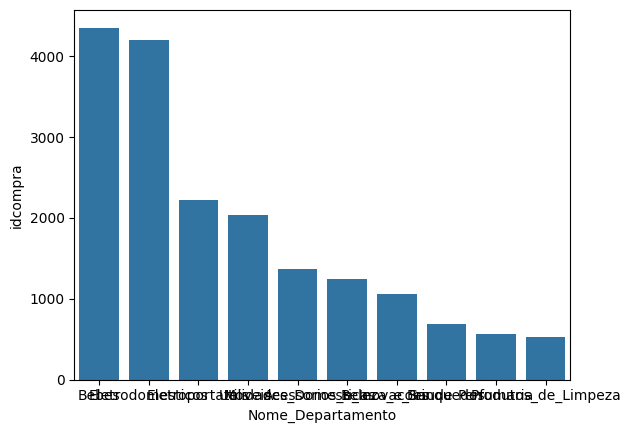

In [16]:
departplot = correct_sales.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False)
sns.barplot(departplot[:10]);

###Média de Preço com frete por Nome de Departamento

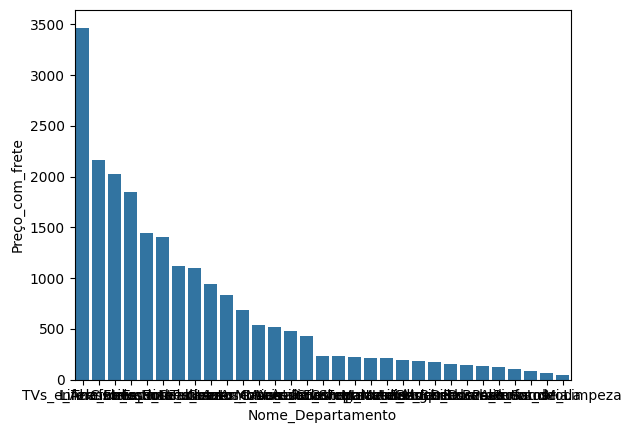

In [17]:
depart_mean = round(correct_sales.groupby('Nome_Departamento').Preço_com_frete.mean().sort_values(ascending=False), 2)
sns.barplot(depart_mean);

###Quantidade de vendas por mês

In [18]:
correct_sales["mes"] = correct_sales["Data"].dt.month

<ipython-input-18-a2905f336fb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_sales["mes"] = correct_sales["Data"].dt.month


In [19]:
#sales_monthly = sales.groupby('Data').idcompra.nunique().sort_values(ascending=False)
#sns.barplot(sales_monthly);

correct_sales.groupby('mes').idcompra.nunique().sort_values(ascending=False)

mes
3    5590
4    5454
1    5309
2    5138
Name: idcompra, dtype: int64

Importing Client base

In [22]:
costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [25]:
costumers = costumers.astype({'renda': 'float'})

In [26]:
costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


###JOIN

In [28]:
sales_costumers = correct_sales.merge(costumers, on='cliente_Log', how='left')
sales_costumers.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


###Média de renda para cada tipo de canal de vendas

In [47]:
media_renda = round(sales_costumers.groupby('idcanalvenda').renda.mean().sort_values(ascending=False).reset_index(), 2)
media_renda
#sns.barplot(media_renda);

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


###Média de idade de cliente por bandeira

In [42]:
media_bandeira = round(sales_costumers.groupby('bandeira').idade.mean().sort_values(ascending=False).reset_index(), 2)
media_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


## Visualização

###Matpltlib

In [35]:
import matplotlib.pyplot as plt

####Média de idade por bandeira

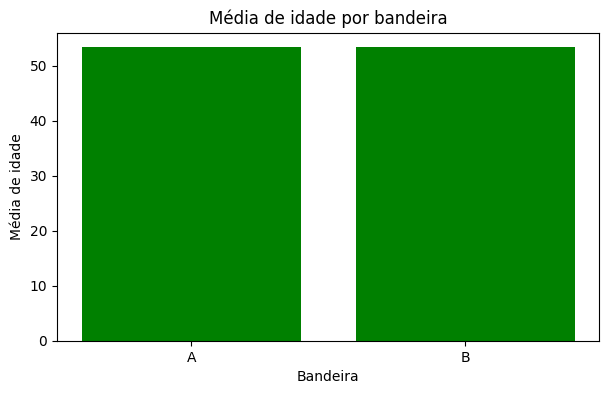

In [46]:
fig = plt.figure(figsize=(7, 4))
plt.bar(media_bandeira.bandeira, media_bandeira.idade, color='green')
plt.xlabel('Bandeira')
plt.ylabel('Média de idade')
plt.title('Média de idade por bandeira')
plt.show;

####Média de renda por canal de venda

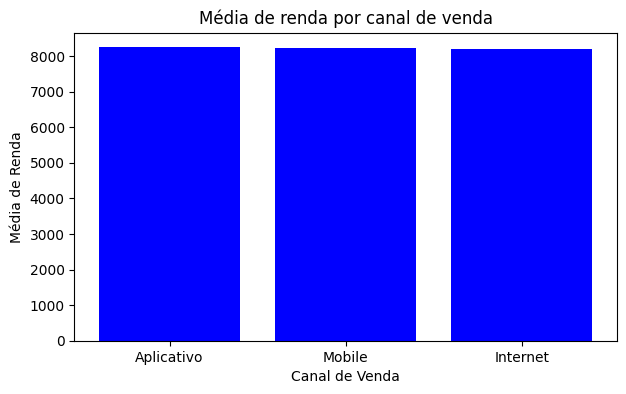

In [49]:
new_fig = plt.figure(figsize=(7, 4))
plt.bar(media_renda.idcanalvenda, media_renda.renda, color='blue')
plt.xlabel('Canal de Venda')
plt.ylabel('Média de Renda')
plt.title('Média de renda por canal de venda')
plt.show;

####Venda por tempo

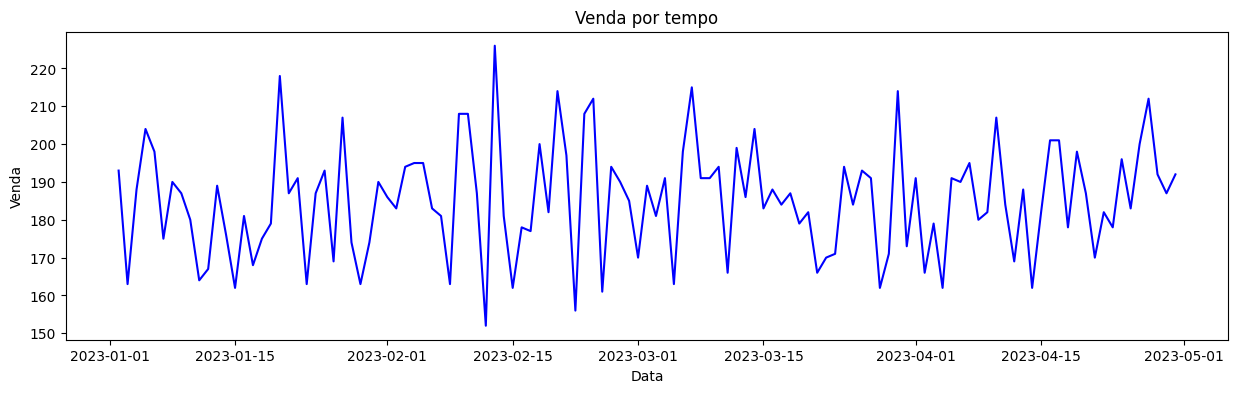

In [73]:
venda_por_tempo = correct_sales.groupby('Data').idcompra.nunique().reset_index()
fig_tempo = plt.figure(figsize=(15, 4))


plt.plot(venda_por_tempo.Data, venda_por_tempo.idcompra, color='blue')
plt.xlabel('Data')
plt.ylabel('Venda')
plt.title('Venda por tempo')
plt.show;

####Média de preço por departamento

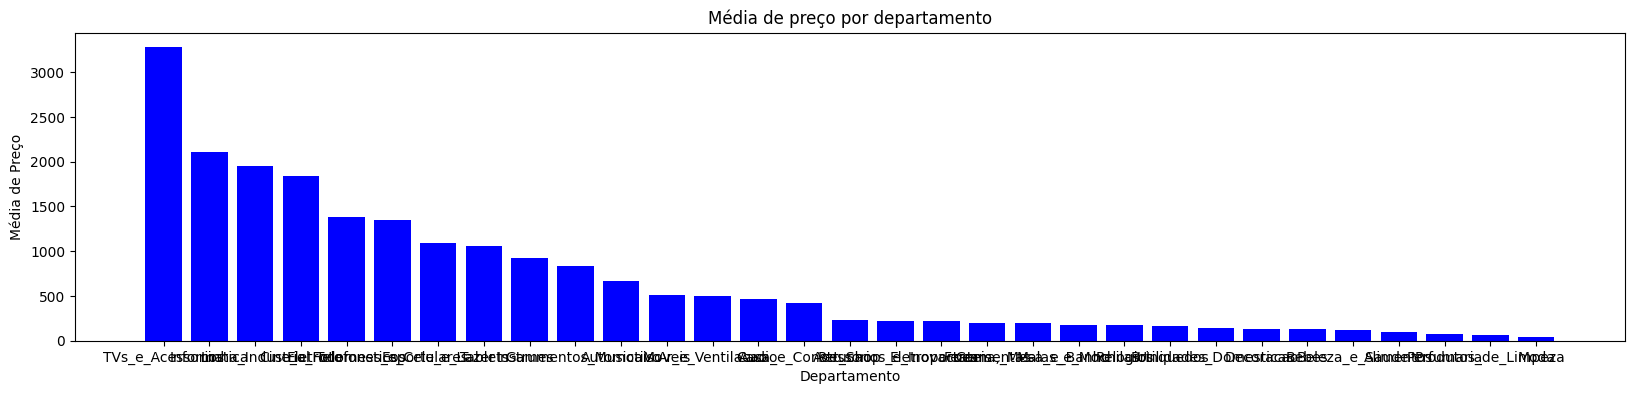

In [66]:
preco_dept = round(correct_sales.groupby('Nome_Departamento').Preço.mean().sort_values(ascending=False).reset_index(), 2)
new_fig = plt.figure(figsize=(20, 4))
plt.bar(preco_dept.Nome_Departamento, preco_dept.Preço, color='blue')
plt.xlabel('Departamento')
plt.ylabel('Média de Preço')
plt.title('Média de preço por departamento')
plt.show;

###Plotly

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [70]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import plotly.express as px

In [72]:
px.bar(media_bandeira, x='bandeira', y='idade', color='bandeira', title='Média de idade por bandeira')

In [74]:
px.line(venda_por_tempo, x='Data', y='idcompra', title='Venda por tempo')

In [75]:
px.bar(preco_dept, x='Nome_Departamento', y='Preço', color='Nome_Departamento', title='Média de preço por departamento')